# 概要

KerasのSequential APIを使ったニューラルネットワークの構築例をまとめる。<br>
分類問題と回帰問題の例をそれぞれ1モデル作成する。


# 分類問題：Fashion MNIST

Fashion MNISTはファッション商品（写真）の画像データセットである。
* ラベル「0」： T-shirt/top（Tシャツ／トップス）
* ラベル「1」： Trouser（ズボン）
* ラベル「2」： Pullover（プルオーバー、頭から被って着る服）
* ラベル「3」： Dress（ドレス）
* ラベル「4」： Coat（コート）
* ラベル「5」： Sandal（サンダル）
* ラベル「6」： Shirt（シャツ）
* ラベル「7」： Sneaker（スニーカー）
* ラベル「8」： Bag（バッグ）
* ラベル「9」： Ankle boot（アンクルブーツ、かかとが隠れる丈のブーツ）

## パッケージインポート

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(f'tensorflow ver.{tf.__version__}')
print(f'keras ver.{keras.__version__}')

tensorflow ver.2.8.0
keras ver.2.8.0


## データロード及び前処理

### データロード

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

### validation分割

In [8]:
valid_size = 5000
x_valid, x_train = x_train_full[:valid_size], x_train_full[valid_size:]
y_valid, y_train = y_train_full[:valid_size], y_train_full[valid_size:]

print(f'x_train.shape : {x_train.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'x_valid.shape : {x_valid.shape}')
print(f'y_valid.shape : {y_valid.shape}')

x_train.shape : (55000, 28, 28)
y_train.shape : (55000,)
x_valid.shape : (5000, 28, 28)
y_valid.shape : (5000,)


### 前処理

In [9]:
# スケーリング0~255を0~1に変換する
x_valid, x_train = x_valid/225.0, x_train/225.0

# クラス名を定義（データ加工ではないが準備作業としてこちらに記載)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# サンプルで1枚目のクラウス名を出力
class_names[y_train[0]]

'Coat'

## モデル作成

### レイヤ構成を定義

In [10]:
# Sequentialモデル生成
model = keras.models.Sequential()
# 平滑化層
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:]))
# 全結合層
model.add(keras.layers.Dense(units=300, activation='relu'))
# 全結合層
model.add(keras.layers.Dense(units=100, activation='relu'))
# 全結合層（出力層）
model.add(keras.layers.Dense(units=10, activation='softmax'))

# レイヤ構成を表示
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### ※モデルの直接操作することもできる

レイヤを取得

In [11]:
model.layers

第1中間レイヤのパラメータを取得

In [12]:
hidden_1_weights, hidden_1_biases = model.layers[1].get_weights()
print(hidden_1_weights[:5])
print(hidden_1_biases[:5])

[[-0.04944597  0.07349831  0.01990774 ...  0.02750799 -0.03978248
   0.06560838]
 [-0.07312918  0.06113352  0.0139228  ...  0.06875364  0.0067235
   0.03491949]
 [ 0.01352143  0.04283768  0.00900155 ... -0.05407209  0.02654656
  -0.02947026]
 [ 0.06204033 -0.07152744 -0.01059729 ... -0.00289328  0.01441121
   0.06374431]
 [ 0.04045644 -0.03840212  0.00438145 ... -0.02346853 -0.0705626
  -0.0361634 ]]
[0. 0. 0. 0. 0.]


第1中間レイヤのパラメータを設定

In [13]:
# 重みとバイアスをすべて1に設定
model.layers[1].set_weights([np.ones_like(model.layers[1].get_weights()[0]), np.ones_like(model.layers[1].get_weights()[1])])
print(model.layers[1].get_weights()[0][:5])
print(model.layers[1].get_weights()[1][:5])

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 1. 1. 1.]


In [14]:
# 重みとバイアスを元に戻す
model.layers[1].set_weights([hidden_1_weights, hidden_1_biases])
print(model.layers[1].get_weights()[0][:5])
print(model.layers[1].get_weights()[1][:5])

[[-0.04944597  0.07349831  0.01990774 ...  0.02750799 -0.03978248
   0.06560838]
 [-0.07312918  0.06113352  0.0139228  ...  0.06875364  0.0067235
   0.03491949]
 [ 0.01352143  0.04283768  0.00900155 ... -0.05407209  0.02654656
  -0.02947026]
 [ 0.06204033 -0.07152744 -0.01059729 ... -0.00289328  0.01441121
   0.06374431]
 [ 0.04045644 -0.03840212  0.00438145 ... -0.02346853 -0.0705626
  -0.0361634 ]]
[0. 0. 0. 0. 0.]


## モデルのコンパイル
モデルの学習プロセスを設定する。<br>
ここで損失関数、オプティマイザ、評価関数を指定する。

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### [損失関数](https://keras.io/api/losses/)
こちらも参考：[tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

|分類|キー|損失関数名|説明|
|-|-|-|-|
|確率的<br>損失関数|binary_crossentropy|2値交差エントロピー|2値分類問題で使用|
||categorical_crossentropy|カテゴリカル交差エントロピー|多クラス分類問題で使用。使用する場合はラベルがone-hot表現である必要がある。|
||sparse_categorical_crossentropy|スパースカテゴリカル交差エントロピー|多クラス分類問題で使用。基本はカテゴリカル交差エントロピーと同じだが、スパースな？ラベルを取る点が異なる。使用するにはラベルと出力の次元が同じである必要がある。|
||KLdivergence|KLダイバージェンス|予測した確率分布と真の確率分布との分布の距離|
||poisson|ピアソン損失|予測値-正解値*log(予測値)の平均|
|回帰損失関数|mean_squared_error|平均二乗誤差|2点間の距離の平均。スケールが2乗になる。|
||mean_absolute_error|平均絶対誤差|差の絶対値の平均|
||mean_absolute_percentage_error|平均絶対パーセント誤差|パーセント誤差（=(予測値-正解値)/正解値）の絶対値の平均。正解に対して何パーセント誤差があるかを測る指標として用いる。|
||mean_squared_logarithmic_error|平均二乗対数誤差|予測値と正解値の対数の平均二乗誤差。対数の引き算は割り算に変換できるため、予測値/正解値を測る指標と解釈できる。|
||logcosh|||
||cosine_similarity|||
||huber|||
|最大マージンの<br>ヒンジ損失関数|hinge|||
||squared_hinge|||
||categorical_hinge|||


### [オプティマイザ](https://keras.io/ja/losses/)
こちらも参考：[tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

|オプティマイザ|説明|
|-|-|
|SGD|確率的勾配降下法。モーメンタム，学習率減衰，Nesterov momentumをサポートしている。|
|RMSprop|RNNと好相性らしい。|
|Adagrad||
|Adadelta||
|Adam|RMSPropとmomumtumを組み合わせたもの。|
|Adamax|無限ノルムに基づく拡張版Adamらしい。|
|Nadam|RMSPropとNesterov momentumを組み合わせたもの。|
|Ftrl||


### [評価関数](https://keras.io/api/metrics/)
こちらも参考：[tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

|分類|クラス名|説明|
|-|-|-|
|正解率|Accuracy||
||BinaryAccuracy||
||CategoricalAccuracy||
||SparseCategoricalAccuracy||
||TopKCategoricalAccuracy||
||SparseTopKCategoricalAccuracy||
|確率|BinaryCrossentropy||
||CategoricalCrossentropy||
||SparseCategoricalCrossentropy||
||KLDivergence||
||Poisson||
|回帰|MeanSquaredError||
||RootMeanSquaredError||
||MeanAbsoluteError||
||MeanAbsolutePercentageError||
||MeanSquaredLogarithmicError||
||CosineSimilarity||
||LogCoshError||
|正誤問題に基づく分類|AUC||
||Precision||
||Recall||
||TruePositives||
||TrueNegatives||
||FalsePositives||
||FalseNegatives||
||PrecisionAtRecall||
||SensitivityAtSpecificity||
||SpecificityAtSensitivity||
|画像セグメンテーション|MeanIoU||
|最大マージンのヒンジ分類|Hinge||
||SquaredHinge||
||CategoricalHinge||

## 学習と評価

### コールバックによる学習中のチェックポイント保存

コールバックは訓練中で適用される関数の集合である。
訓練中にモデル内部の状態と統計量を可視化するためにコールバックを使う。

SequentialとModelクラスの.fit()メソッドに（キーワード引数callbacksとして）コールバックのリストを渡すことができる。<br>
これを使って学習中のチェックポイントを保存することが出来る。

大規模データや層が深いモデルを扱うときには学習に時間がかかるため、google colabなどクラウド実行時にセッションが切れてしまうような場合にこのような設定が有効である。

今回はsave_best_only=Trueとしてvalidationに対して性能が最高のモデルの時に保存する（早期打ち切り）

In [16]:
# 各エポック終了時のモデルを保存するコールバック関数
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_sequential_classification_model.h5', save_best_only=True)  

### 学習

In [17]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.7713 - val_loss: 0.5054 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4804 - accuracy: 0.8316 - val_loss: 0.4870 - val_accuracy: 0.8314
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4358 - accuracy: 0.8471 - val_loss: 0.4187 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4093 - accuracy: 0.8555 - val_loss: 0.3867 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3886 - accuracy: 0.8618 - val_loss: 0.4725 - val_accuracy: 0.8228
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8678 - val_loss: 0.3809 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3596 - accuracy: 0.8717 - val_loss: 0.3760 - val_accuracy:

### 学習結果の可視化

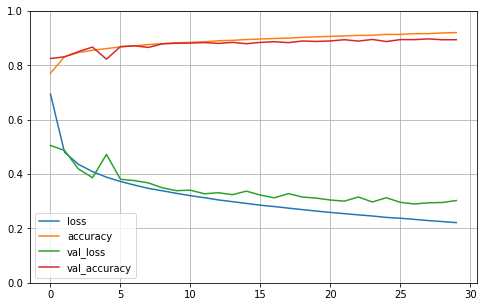

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))  # historyはエポック毎のloss, accuracy, val_loss, val_accuracyを保持する
plt.grid(True)
plt.gca().set_ylim(0, 1) # 縦の範囲を 0 から 1 までに
plt.show()

この例では、訓練の開始時には検証セットでの成績の方が訓練セットでの成績よりも高いように見えるが、実際にはそうではない。検証誤差は各エポックの最後に計算されるのに対し、訓練誤差は各エポックの途中で移動平均を使って計算されている。そのため、訓練セットの曲線は、半エポック分左にずらすべきところなのである。

実際にそうすると、訓練セットと検証セットの曲線は、訓練開始時にはほぼ完全に重なり合うこと
がわかる~~らしいがやり方は分からない~~。

### 評価

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 62.1298 - accuracy: 0.8426


[62.12981414794922, 0.8425999879837036]

In [20]:
# コールバック関数で保存した最高性能のモデルにロールバック
model = keras.models.load_model('my_keras_sequential_classification_model.h5')

In [21]:
# ロールバック後のモデルで再評価
mse_test = model.evaluate(x_test, y_test)
mse_test

313/313 [==============================] - 0s 1ms/step - loss: 51.7288 - accuracy: 0.8553


[51.72883605957031, 0.8553000092506409]

## 学習済みモデルを使った予測

In [22]:
# サンプル用にデータサイズを限定
x_new = x_test[:3]

# 各クラスに分類される確率を出力する
print('========== predict : probability ==========')
y_proba = model.predict(x_new)
print(y_proba.round(2))

print('========== predict : class ==========')
# y_pred = model.predict_classes(x_new)  # 廃止メソッドのよう
y_pred = np.argmax(model.predict(x_new), axis=1)  # 確率最大のクラスを出力する
print(y_pred)
print(np.array(class_names)[y_pred])


========== predict : probability ==========
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
========== predict : class ==========
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


画像を表示して確認

Saving figure fashion_mnist_images_plot


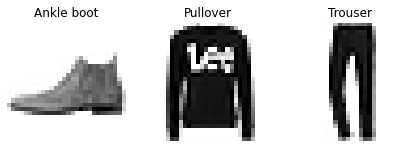

In [23]:
import os
# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## モデルの保存と復元

### 保存

Keras は HDF5 形式を使ってモデルのアーキテクチャ（すべてのハイパーパラメータを含む）とすべての層のモデルパラメータの値（たとえば接続重みやバイアス）を保存する。
さらに、オプティマイザ（ハイパーパラメータやその他の状態情報を含む）も保存する。

In [24]:
model.save('my_keras_sequential_classification_model.h5')

### 復元

In [25]:
model = keras.models.load_model('my_keras_sequential_classification_model.h5')

# 回帰問題：sklearn.datasets.fetch_california_housing

## パッケージインポート

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense  # layerクラスを直接インポートして使用出来る

##### これうまくいくはずなんだけど学習できてない #####
from tensorflow.keras.losses import MeanSquaredError  # 損失関数クラスを直接インポートして使用出来る
from tensorflow.keras.optimizers import SGD  # オプティマイザクラスを直接インポートして使用出来る
##################################################

import numpy as np
import pandas as pd

print(f'tensorflow ver.{tf.__version__}')
print(f'keras ver.{keras.__version__}')

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tensorflow ver.2.8.0
keras ver.2.8.0


##  データロードと前処理

### データロード

In [27]:
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)


### validation分割

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

# データサイズを確認
print(f'x_train.shape : {x_train.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'x_valid.shape : {x_valid.shape}')
print(f'y_valid.shape : {y_valid.shape}')

x_train.shape : (11610, 8)
y_train.shape : (11610,)
x_valid.shape : (3870, 8)
y_valid.shape : (3870,)


trainデータを確認

In [29]:
pd_x_train = pd.DataFrame(x_train, columns=housing.feature_names)
display(pd_x_train)
pd_x_train.info()
pd_x_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,10.7237,21.0,8.837607,1.000000,323.0,2.760684,37.41,-122.18
1,2.6535,26.0,3.167647,1.067647,3193.0,3.130392,33.95,-118.36
2,2.9479,5.0,5.564151,1.266038,1620.0,3.056604,34.55,-117.54
3,4.8295,10.0,5.938998,1.013072,1773.0,3.862745,34.44,-118.13
4,10.3893,18.0,6.750000,0.972222,316.0,2.925926,33.62,-117.85
...,...,...,...,...,...,...,...,...
11605,3.5403,36.0,6.226244,1.162896,687.0,3.108597,33.91,-117.90
11606,5.0524,18.0,5.187870,1.051775,1224.0,1.810651,37.91,-122.38
11607,3.7083,10.0,5.703604,1.063964,3419.0,3.080180,38.46,-121.82
11608,3.5481,35.0,4.547511,1.013575,742.0,3.357466,34.13,-118.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      11610 non-null  float64
 1   HouseAge    11610 non-null  float64
 2   AveRooms    11610 non-null  float64
 3   AveBedrms   11610 non-null  float64
 4   Population  11610 non-null  float64
 5   AveOccup    11610 non-null  float64
 6   Latitude    11610 non-null  float64
 7   Longitude   11610 non-null  float64
dtypes: float64(8)
memory usage: 725.8 KB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,3.894098,28.682515,5.445182,1.097018,1423.704393,3.086505,35.619636,-119.563125
std,1.926992,12.629721,2.675345,0.522784,1169.391033,12.452525,2.127324,2.007963
min,0.499900,1.000000,0.888889,0.375000,3.000000,0.692308,32.560000,-124.350000
25%,2.565050,18.000000,4.462816,1.006332,785.000000,2.435381,33.930000,-121.810000
50%,3.551400,29.000000,5.239784,1.048485,1163.000000,2.822018,34.250000,-118.490000
75%,4.781300,37.000000,6.058570,1.098736,1712.000000,3.274970,37.700000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### 前処理

#### スケーリング

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
データの標準化を行う。

代表的なメソッドは以下：

|メソッド|説明|
|---|---|
|fit()|標準化するための平均と分散を計算する。|
|trasform()|（事前に計算した平均と分散を使用して）標準化を行う。|
|fit_transform()|平均と分散を計算し、標準化を行う。|

In [30]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)  # x_trainの平均・分散を使用する（のはなぜ？）
x_test = scaler.transform(x_test)  # x_trainの平均・分散を使用する（のはなぜ？）

## モデル作成

### レイヤ構成を定義

In [31]:
# 初期化時にレイヤのリストを渡すことでレイヤ定義も同時に行う
model = keras.models.Sequential([
    Dense(30, activation='relu', input_shape=x_train.shape[1:])
    , Dense(1)  # 予測値を出力するため出力層のノード数は1
])

## モデルのコンパイル

In [32]:
# model.compile(loss=MeanSquaredError(), optimizer=SGD())  # なぜかこっちは学習結果がNaNになる
# model.compile(loss="mean_squared_error", optimizer=SGD())  # なぜか全然学習が進まない
# model.compile(loss=MeanSquaredError(), optimizer='sgd')  # なぜか全然学習が進まない
model.compile(loss="mean_squared_error", optimizer='sgd')

# モデルのレイヤ構成を表示
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## 学習と評価

### コールバックによる学習中のチェックポイント保存

今回早期打ち切り設定を入れるためにEarlyStopping関数を使用する。<br>
このコールバック関数は学習打ち切り時に性能が最高だった時の重みを自動で復元するかを選べる。これを使うと最良モデルの保存と復元は不要になる。

In [33]:
# 早期打ち切りのコールバック関数
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  # patienceで指定したエポック数学習が進まなかったときに学習を打ち切る

また、コールバック関数は自作したものを使うことが出来る。<br>


自作コールバックの作り方については以下を参照：<br>
[TensorFlow.Kerasガイド_コールバックを書く](https://www.tensorflow.org/guide/keras/custom_callback?hl=ja)<br>
以下のようなことが記載されている。
* メソッド名と呼び出しタイミング

|メソッドの種類|メソッド名|呼び出しタイミング|
|-|-|-|
|グローバルメソッド|on_(train/test/predict)_begin(self, logs=None)|fit/evalute/predictメソッドの先頭|
||on_(train/test/predict)_end(self, logs=None)|fit/evaluate/predictメソッドの最後|
|バッチレベルメソッド|on_(train/test/predict)_batch_begin(self, batch, logs=None)|トレーニング/テスト/予測の各バッチの直前|
||on_(train/test/predict)_batch_end(self, batch, logs=None)|トレーニング/テスト/予測の各バッチの終了時|
|エポックレベルメソッド|on_epoch_begin(self, epoch, logs=None)|トレーニングの各エポックの先頭|
||on_epoch_end(self, epoch, logs=None)|トレーニングの各エポックの最後|

* logs ディクショナリ<br>
    →バッチまたはエポックの最後の損失値と全てのメトリクスを含む。これを利用して学習過程を出力したり早期打ち切りを実装したりできる。

例として学習中の訓練データのlossとvalidationデータのlossの比率を表示する関数を作成する。（過学習を検知すること想定）

In [34]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):  # トレーニングの各エポックの最後
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))  # logsディレクトリからval_lossとlossを取得

print_valid_train_ration_cb = PrintValTrainRatioCallback()

### TensorBoardを使った可視化

TensorBoardを使って訓練中の学習曲線を表示したり、複数の実行の学習曲線を比較したり、計算グラフを表示したり、訓練の統計情報を解析したりすることが出来る。

TensorBoardはコールバック関数として準備されている。<br>
利用するにはイベントファイルと呼ばれるバイナリファイルを出力させる必要がある。

また、TensorBoardサーバを立てる必要がある。<br>
TensorBoardサーバはロートログディレクトリを参照し、プログラムには実行ごとに別のサブディレクトリをに出力するように設定する。こうすることで複数の実行から得た情報が混ざることなく使用することが出来る。

ここでは実行ごとのログディレクトリ名を生成する関数を定義し、その関数を使って生成したログディレクトリ名をTensorBoardのコールバックに渡す。

In [35]:
import os

# ログ出力のルートディレクトリ
root_dir = os.path.join(os.curdir, 'my_logs')

# ログディレクトリ名を生成する関数
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_dir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

### 学習

In [36]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb, print_valid_train_ration_cb, tensorboard_cb])

Epoch 1/100
349/363 [===========================>..] - ETA: 0s - loss: 0.9747
val/train: 0.58
363/363 [==============================] - 1s 2ms/step - loss: 0.9597 - val_loss: 0.5542
Epoch 2/100
356/363 [============================>.] - ETA: 0s - loss: 0.6194
val/train: 0.78
363/363 [==============================] - 0s 1ms/step - loss: 0.6185 - val_loss: 0.4850
Epoch 3/100
361/363 [============================>.] - ETA: 0s - loss: 0.4912
val/train: 0.99
363/363 [==============================] - 0s 1ms/step - loss: 0.4931 - val_loss: 0.4873
Epoch 4/100
357/363 [============================>.] - ETA: 0s - loss: 0.4948
val/train: 0.93
363/363 [==============================] - 0s 1ms/step - loss: 0.4937 - val_loss: 0.4573
Epoch 5/100
321/363 [=========================>....] - ETA: 0s - loss: 0.4873
val/train: 0.90
363/363 [==============================] - 1s 1ms/step - loss: 0.4794 - val_loss: 0.4329
Epoch 6/100
315/363 [=========================>....] - ETA: 0s - loss: 0.4509
val/tra

In [42]:
%load_ext tensorboard

%tensorboard --logdir ./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 59349), started 0:16:01 ago. (Use '!kill 59349' to kill it.)

### 評価

In [38]:
mse_test = model.evaluate(x_test, y_test)
mse_test

162/162 [==============================] - 0s 713us/step - loss: 0.3482


0.34820038080215454

## 学習済みモデルを使った予測

In [39]:
# サンプル用にデータサイズを限定
x_new = x_test[:3]

y_pred = model.predict(x_new)
print(f'predict : {y_pred.reshape(-1)}')
print(f'correct : {y_test[:3]}')

predict : [2.0469236 0.7469141 2.8435235]
correct : [2.299 0.867 2.827]


## モデルの保存と復元

Keras は HDF5 形式を使ってモデルのアーキテクチャ（すべてのハイパーパラメータを含む）とすべての層のモデルパラメータの値（たとえば接続重みやバイアス）を保存する。
さらに、オプティマイザ（ハイパーパラメータやその他の状態情報を含む）も保存する。

In [40]:
model.save('my_keras_sequential_regression_model.h5')

### 復元

In [41]:
model = keras.models.load_model('my_keras_sequential_regression_model.h5')